Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Kanawut Kaewnoparat"
ID = "st122109"

---

# Lab 05: Optimization Using Newton's Method

In this lab, we'll explore an alternative to gradient descent
for nonlinear optimization problems: Newton's method.

## Newton's method in one dimension

Consider the problem of finding the *roots* $\textbf{x}$ of a nonlinear function $f: \mathbb{R}^N \rightarrow \mathbb{R}$. A root of $f$ is a point $\mathbf{x}$ that satisfies $f(\mathbf{x}) = 0$.

In one dimension, Newton's method for finding zeroes works as follows:

1. Pick an initial guess $x_0$

2. Let $x_{i+1} = x_i + \frac{f(x_i)}{f'(x_i)}$

3. If not converged, go to #2.

Convergence occurs when $|f(x_i)| < \epsilon_1$ or when $|f(x_{i+1})-f(x_i)| < \epsilon_2$.

Let's see how this works in practice.

### Example 1: Root finding for a cubic polynomial

Let's begin by using Newton's method to find roots of a simple cubic
polynomial $$ f(x) = x^3 + x^2 .$$

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

Here's a function to evaluate a polynomial created with Numpy's `poly1d` function
at a particular point $x$:

In [3]:
def fx(x, p):
    f_x = np.polyval(p, x)
    return f_x

In [4]:
np.polyval([3,5,2], 2)

24

In [5]:
np.polyval([2,1,5, 3], 2)

33

In [6]:
np.polyval([3,5,2], 1)

10

And here's some code to create the polynomial $x^3 + x^2$, get its derivative, and evalute
the derivative at 200 points along the $x$ axis:;

In [7]:
print(np.poly1d([2,1,0,1]))

   3     2
2 x + 1 x + 1


In [8]:
np.polyval([3,5,2], [1,2,4])

array([10, 24, 70])

In [9]:
# Create the polynomial f(x) = x^3 + x^2 
p = np.poly1d([1, 1, 0, 0]) # [1 * x^3, 1 * x^2, 0 * x^1, 0 * 1]

# Get f'(x) (the derivative of f(x) in polynomial form)
# We know it's 2x^2 + 2x, which is [3, 2, 0] in poly1d form
p_d = np.polyder(p)

print('f(x):')
print('----------')
print(p)
print('----------')
print("f'(x):")
print('----------')
print(p_d)
print('----------')

# Get 200 points along the x axis between -3 and 3
n = 200
x = np.linspace(-3, 3, n)  

# Get values for f(x) and f'(x) in order to graph them later
y = fx(x, p)
y_d = fx(x,p_d)

f(x):
----------
   3     2
1 x + 1 x
----------
f'(x):
----------
   2
3 x + 2 x
----------


Next, let's try three possible guesses for $x_0$: -3, 1, and 3, and in each case, run
Newton's root finding method from that initial guess.

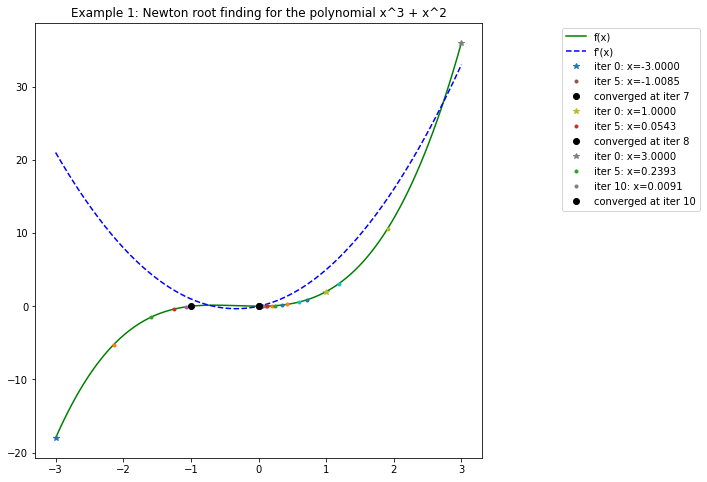

In [10]:
# Initial guesses
x0_arr = [-3.0, 1.0, 3.0]

# Parameters for Newton: number of iterations,
# threshold for identifying a point as a zero
max_iters = 30
threshold = 0.0001

# Set up plot
fig1 = plt.figure(figsize=(8,8)) 
ax = plt.axes()
plt.plot(x, y, 'g-', label='f(x)')
plt.plot(x, y_d, 'b--', label="f'(x)")

roots = []
for x0 in x0_arr:
    i = 0
    xi = x0
    fxi = fx(xi, p)
    # Plot initial data point
    plt.plot(xi, fxi, '*', label=("iter 0: x=%.4f" % x0))
    while i < max_iters:
        # x_i+1 = x_i - f(x_i)/f'(x_i)
        xi = xi - fx(xi, p) / fx(xi, p_d) #NEWTON'S METHOD
        fxi = fx(xi, p)
        # Plot (xi, fxi) and add a legend entry every 5 iterations
        if (i+1) % 5 == 0:
            plt.plot(xi, fxi, '.', label=("iter %d: x=%.4f" % (i+1, xi)))
        else:
            plt.plot(xi, fxi, '.')        
        # Check if |f(x)| < threshold
        if np.abs(fxi) < threshold:
            roots.append(xi)
            break
        i = i + 1
    plt.plot(xi, fx(xi, p), 'ko', label=("converged at iter %d" % (i+1)))

plt.legend(bbox_to_anchor=(1.5, 1.0), loc='upper right')
plt.title('Example 1: Newton root finding for the polynomial x^3 + x^2')

plt.show()

### Example 2: Root finding for the sine function

Next, consider the function $f(x) = \sin(x)$:

In [11]:
def fx_sin(x):  
    return np.sin(x)        

def fx_dsin(x):    
    return np.cos(x)

Let's get 200 points in the range $[-\pi, \pi]$ for plotting:

In [12]:
# Get f(x)=sin(x) and f'(x) at 200 points for plotting
n = 200
x = np.linspace(-np.pi, np.pi, n)  
y = fx_sin(x)
y_d = fx_dsin(x)

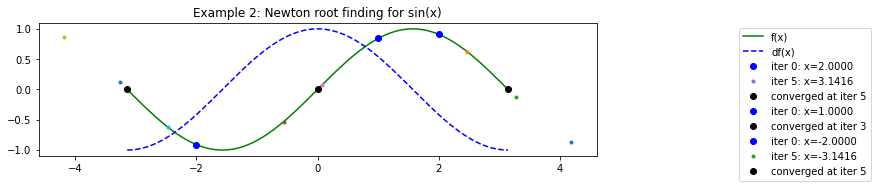

Roots: 3.141593, -0.000096, -3.141593


In [13]:
# Initial guesses
x0_arr = [2.0, 1.0, -2.0]

# Parameters for Newton: number of iterations,
# threshold for identifying a point as a zero
max_iters = 30
threshold = 0.0001

# Set up plot
fig1 = plt.figure(figsize=(10,10)) 
ax = plt.axes()
ax.set_aspect(aspect='equal', adjustable='box')
plt.plot(x, y, 'g-', label='f(x)')
plt.plot(x, y_d, 'b--', label='df(x)')

roots = []
for x0 in x0_arr:
    i = 0;
    xi = x0
    fxi = fx_sin(xi)
    # Plot initial data point
    plt.plot(xi, fxi, 'bo', label=("iter 0: x=%.4f" % x0))
    while i < max_iters:
        # x_i+1 = x_i - f(x_i)/f'(x_i)
        xi = xi - fx_sin(xi) / fx_dsin(xi)
        fxi = fx_sin(xi)
        # Plot (xi, fxi) and add a legend entry every 5 iterations
        if (i+1) % 5 == 0:
            plt.plot(xi, fxi, '.', label=("iter %d: x=%.4f" % (i+1, xi)))
        else:
            plt.plot(xi, fxi, '.')        
        # Check if |f(x)| < threshold        
        if np.abs(fxi) < threshold:
            roots.append(xi)
            break
        i = i + 1
    plt.plot(xi, fx_sin(xi), 'ko', label=("converged at iter %d" % (i+1)))

plt.legend(bbox_to_anchor=(1.5, 1.0), loc='upper right')
plt.title('Example 2: Newton root finding for sin(x)')

plt.show()

print('Roots: %f, %f, %f' % (roots[0], roots[1], roots[2]))

Notice that we get some extreme values of x for some cases. For example, when $x_0 = -2$, where
the slope is pretty close to 0, the next iteration gives a value less than -4.

## Newton's method for optimization

Now, consider the problem of minimizing a scalar function $J : \mathbb{R}^n \mapsto \mathbb{R}$.
We would like to find
$$ \theta^* = \text{argmin}_\theta J(\theta) $$
We already know gradient descent:
$$ \theta^{(i+1)} \leftarrow \theta^{(i)} - \alpha \nabla_J(\theta^{(i)}).$$
But Newton's method gives us a potentially faster way to find $\theta^*$ as a zero of
the system of equations
$$\nabla_J(\theta^*) = \mathbf{0}.$$

In one dimension, to find the zero of $f'(x)$, obviously, we would apply Newton's method
to $f'(x)$, obtaining the iteration
$$x_{i+1} = x_i - f'(x_i) / f''(x_i).$$
The multivariate extension of Newton's optimization method is
$$\mathbf{x}_{i+1} = \mathbf{x}_i - \mathtt{H}^{-1}_f(\mathbf{x}_i) \nabla_f(\mathbf{x}_i),$$
where $\mathtt{H}_f(\mathbf{x})$ is the *Hessian* of $f$ evaluated at $\textbf{x}$:
$$\mathtt{H}_f(\mathbf{x}) = \begin{bmatrix}
\frac{\partial^2 f}{\partial x_1^2} & \frac{\partial^2 f}{\partial x_1 x_2} & \cdots & \frac{\partial^2 f}{\partial x_1 x_n} \\
\frac{\partial^2 f}{\partial x_2 x_1} & \frac{\partial^2 f}{\partial x_2^2} & \cdots & \frac{\partial^2 f}{\partial x_2 x_n} \\
\vdots & \vdots & \ddots & \vdots \\
\frac{\partial^2 f}{\partial x_n x_1} & \frac{\partial^2 f}{\partial x_n x_2} & \cdots & \frac{\partial^2 f}{\partial x_n^2}
\end{bmatrix}$$

This means, for the minimization of $J(\theta)$, we would obtain the update rule
$$\theta^{(i+1)} \leftarrow \theta^{(i)} - \mathtt{H}^{-1}_J(\theta^{(i)}) \nabla_J(\theta^{(i)}).$$


## Application to logistic regression

Let's create some difficult sample data as follows:

**Class 1:** Two features $x_1$ and $x_2$ jointly distributed as a two-dimensional spherical Gaussian with parameters

$$\mu = \begin{bmatrix} x_{1c} \\ x_{2c} \end{bmatrix},
\Sigma = \begin{bmatrix} \sigma_1^2 & 0 \\ 0 & \sigma_1^2 \end{bmatrix}.$$

**Class 2:** Two features $x_1$ and $x_2$ in which the data are generated by first sampling an angle $\theta$ according to a uniform distribution, sampling a distance $d$ according to a one-dimensional Gaussian with a mean of $(3\sigma_1)^2$ and a variance of $(\frac{1}{2}\sigma_1)^2$, then outputting the point $$\textbf{x} = \begin{bmatrix} x_{1c} + d \cos\theta \\ x_{2c} + d \sin\theta \end{bmatrix} .$$

Generate 100 samples for each of the classes, guided by the following exercises.

### Exercise 1.1 (5 points)

Generate data for class 1 with 100 samples:

$$\mu = \begin{bmatrix} x_{1c} \\ x_{2c} \end{bmatrix},
\Sigma = \begin{bmatrix} \sigma_1^2 & 0 \\ 0 & \sigma_1^2 \end{bmatrix}.$$

<details>
    <summary><font size="3" color="green"><b>Hint:</b></font></summary>
    You can use <a href="https://numpy.org/doc/stable/reference/random/generated/numpy.random.multivariate_normal.html">numpy.random.multivariate_normal</a> to generate samples.
</details>

In [14]:
mu_1 = np.array([1.0, 2.0])
sigma_1 = 1
num_sample = 100

sigma_vector = np.array([sigma_1, sigma_1])
cov_mat = np.diag(sigma_vector)
print(f"covariance matrix:\n {cov_mat}")
print()

X1 = np.random.multivariate_normal(mean = mu_1, cov = cov_mat, size = num_sample)

print(X1[:5])
X1.mean(axis=0)
# YOUR CODE HERE
# raise NotImplementedError()

covariance matrix:
 [[1 0]
 [0 1]]

[[ 0.93961715  2.09174582]
 [ 0.41114958  2.48695983]
 [ 0.5398311   3.22641907]
 [-0.24316161  0.87464345]
 [ 0.67288163  0.98057817]]


array([0.89755737, 1.84060126])

In [15]:
print(X1[:5])

# Test function: Do not remove
assert X1.shape == (100, 2), 'Size of X1 is incorrect'
assert cov_mat.shape == (2, 2), 'Size of x_test is incorrect'
count = 0 
for i in range(2):
    for j in range(2):
        if i==j and cov_mat[i,j] != 0:
            if cov_mat[i,j] == sigma_1:
                count += 1
        else:
            if cov_mat[i,j] == 0:
                count += 1
assert count == 4, 'cov_mat data is incorrect'

print("success!")
# End Test function

[[ 0.93961715  2.09174582]
 [ 0.41114958  2.48695983]
 [ 0.5398311   3.22641907]
 [-0.24316161  0.87464345]
 [ 0.67288163  0.98057817]]
success!


**Expected result (or something similar):**\
[[-0.48508229  2.65415886]\
 [ 1.17230227  1.61743589]\
 [-0.61932146  3.53986541]\
 [ 0.70583088  1.45944356]\
 [-0.93561505  0.2042285 ]]

### Exercise 1.2 (5 points)

Generate data for class 2 with 100 samples:

$$\textbf{x} = \begin{bmatrix} x_{1c} + d \cos\theta \\ x_{2c} + d \sin\theta \end{bmatrix}$$

where $\theta$ is sampled uniformly from
$[0, 2\pi]$ and $d$ is sampled from a one-dimensional Gaussian
with a mean of $(3\sigma_1)^2$ and a variance of $(\frac{1}{2}\sigma_1)^2$.

<details>
    <summary><font size="3" color="green"><b>Hint:</b></font></summary>
    You can use <a href="https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html">numpy.random.uniform</a> and/or <a href="https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html">numpy.random.normal</a> to generate these samples.
</details>

In [16]:
np.pi

3.141592653589793

In [17]:
# 1. Create sample angle from 0 to 2pi with 100 samples
angle = np.random.uniform(0, 2*np.pi, size= num_sample)
print(angle.shape)


# 2. Create sample with normal distribution of d with mean and variance
d =  np.random.normal(loc = (3*sigma_1)**2, scale = (sigma_1 /2)**2, size =num_sample)
print(d.shape)


# 3 Create X2
X2 = np.vstack((X1[:, 0] + (d * np.cos(angle)), X1[:, 1] + (d * np.sin(angle)))).T



# YOUR CODE HERE
# raise NotImplementedError()

(100,)
(100,)


In [18]:
X1[:, 0].shape

(100,)

In [19]:
np.vstack((X1[:, 0] - (d * np.cos(angle)), X1[:, 1] - (d * np.sin(angle)))).T

array([[ 2.96008865, -7.06612894],
       [-5.48175108,  8.9010257 ],
       [ 9.14287679,  0.73877222],
       [ 7.89868875,  4.87379543],
       [-7.60228533,  5.03025906],
       [ 6.33487392,  8.91623875],
       [ 0.68080784, -6.70786588],
       [-7.59470607, -1.5011998 ],
       [-7.25443377,  3.78844097],
       [ 5.38799381, -4.83738222],
       [ 8.73332188,  8.55823444],
       [-7.99497509,  2.44369681],
       [ 8.35112927,  9.56425151],
       [ 5.64041528, -5.38478839],
       [-6.00294295, -3.13119899],
       [ 5.71505013, 10.75831802],
       [ 1.98128536, 11.89507898],
       [-7.82714798, -2.2790989 ],
       [ 3.070826  , -8.32430685],
       [10.53823534,  2.48982195],
       [ 3.93647954, 10.49708356],
       [-6.29442054,  6.63731663],
       [-8.16166793,  1.56427131],
       [-4.77078483,  8.73999081],
       [-2.28672369, 11.1264415 ],
       [ 6.36392317,  9.00619679],
       [ 9.80311426, -3.00724707],
       [-1.91448507,  9.97443549],
       [-6.10000181,

In [20]:
print('angle:',angle[:5])
print('d:', d[:5])
print('X2:', X2[:5])

# Test function: Do not remove
assert angle.shape == (100,) or angle.shape == (100,1) or angle.shape == 100, 'Size of angle is incorrect'
assert d.shape == (100,) or d.shape == (100,1) or d.shape == 100, 'Size of d is incorrect'
assert X2.shape == (100,2), 'Size of X2 is incorrect'
assert angle.min() >= 0 and angle.max() <= 2*np.pi, 'angle generate incorrect'
assert d.min() >= 8 and d.max() <= 10, 'd generate incorrect'
assert X2[:,0].min() >= -13 and X2[:,0].max() <= 13, 'X2 generate incorrect'
assert X2[:,1].min() >= -10 and X2[:,1].max() <= 13.5, 'X2 generate incorrect'

print("success!")
# End Test function

angle: [1.7879443  5.45546526 2.8601113  3.59816315 5.82807172]
d: [9.37811149 8.71013887 8.95548893 9.07099465 9.21294217]
X2: [[-1.08085435 11.24962057]
 [ 6.30405024 -3.92710604]
 [-8.06321458  5.71406592]
 [-8.38501197 -3.12450854]
 [ 8.94804858 -3.06910271]]
success!


**Expected result (or something similar):**\
angle: [4.77258271 3.19733552 0.71226709 2.11244845 6.06280915]\
d: [9.13908279 8.84218552 9.24427852 8.74831667 8.85727588]\
X2: [[ 0.064701   -6.46837219]\
 [-7.65614929  1.12480234]\
 [ 6.37750805  9.58147629]\
 [-3.80438416  8.95550952]\
 [ 7.70745021 -1.73194274]]

### Exercise 1.3 (5 points)

Combine X1 and X2 into single dataset

In [21]:
np.concatenate((X1, X2)).shape

(200, 2)

In [22]:
np.concatenate((([0] * 100), ([1]*100)))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [23]:
# 1. concatenate X1, X2 together
X = np.concatenate((X1, X2))
# 2. Create y with class 1 as 0 and class 2 as 1
y = np.concatenate((([0] * 100), ([1]*100)))

# YOUR CODE HERE
# raise NotImplementedError()

In [24]:
#alternative method
# X = np.concatenate([X1, X2],axis = 0)
# y = np.append(np.zeros(num_sample),np.ones(num_sample))

In [25]:
print("shape of X:", X.shape)
print("shape of y:", y.shape)

# Test function: Do not remove
assert X.shape == (200, 2), 'Size of X is incorrect'
assert y.shape == (200,) or y.shape == (200,1) or y.shape == 200, 'Size of y is incorrect'
assert y.min() == 0 and y.max() == 1, 'class type setup is incorrect'

print("success!")
# End Test function

shape of X: (200, 2)
shape of y: (200,)
success!


**Expect result (or looked alike):**\
shape of X: (200, 2)\
shape of y: (200, 1)

### Exercise 1.4 (5 points)

Plot the graph between class1 and class2 with **difference color and point style**.

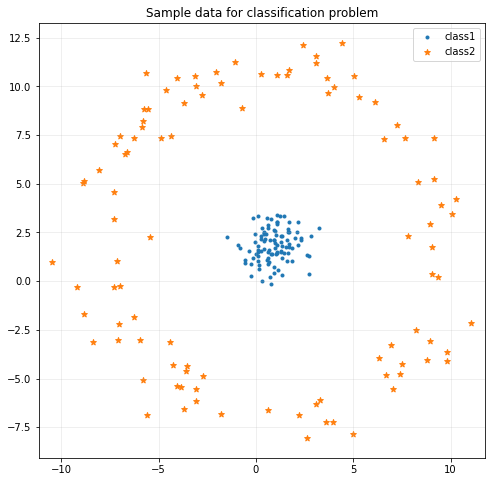

In [26]:
fig1 = plt.figure(figsize=(8,8))
ax = plt.axes() 
plt.title('Sample data for classification problem')
plt.grid(axis='both', alpha=.25)


plt.scatter(X1[:, 0], X1[:, 1], marker = '.', label = 'class1')
plt.scatter(X2[:, 0], X2[:, 1], marker = '*', label = 'class2')


plt.legend()
plt.axis('equal')
plt.show()

**Expect result (or looked alike):**

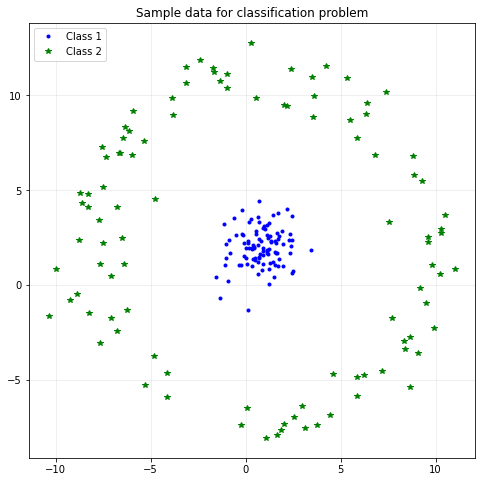

### Exercise 1.5 (5 points)

Split data into training and test datasets with 80% of training set and 20% of test set

In [27]:
all_idx = np.arange(len(X))
np.random.seed(16)
np.random.shuffle(all_idx)

In [28]:
all_idx

array([154,   0, 174,  59, 112, 170,  73,   7,  29,  32,  90,  96,  54,
       134,  56,  81,  72, 187,  51, 100,  79, 171, 113, 118,  47,  52,
       180,  39, 135, 105, 124,  19,  71,  99, 153, 189,   9, 142, 155,
       156,  45, 195, 178, 104, 190, 183,  82, 166,  20, 177,  83, 131,
        61,  77, 181,  48, 102,  11,  53,   2,  42,   1,  60, 193,  87,
       117, 157, 122, 167,  66, 163, 149,  26, 147,  78,  35, 126,  13,
        63,   5,  75,  70, 136,  55,  50, 141,  94,  95, 103, 132,  67,
       194, 182, 197,  49, 172,  76, 140,  34,  89, 138,  25,  10,  43,
       133,  30,  84, 111,  17, 164, 173, 161,   3,  68,  98, 109, 179,
        86, 176, 151,  57,  33,  38, 198,  97, 137,  64, 139, 152, 106,
        91, 150, 188, 130, 192,  36,  80,  27, 143,  22, 184,  23,  92,
        62,  24, 129,  12, 199,   6,  46, 191, 119, 107,  88, 185,  44,
       148,  18,  21,  16, 168, 186,  15,  85,  37,  14, 108, 127,  40,
       145, 165,   8, 115, 114, 175,  28, 101, 128,  93, 162,  7

In [29]:
train_size = 0.8
m = len(X)
start_stop_idx = round(train_size * m )

idx_train = all_idx[: start_stop_idx]
idx_test =  all_idx[start_stop_idx: ]

X_train = X[idx_train]
X_test = X[idx_test]
y_train = y[idx_train]
y_test = y[idx_test]

# YOUR CODE HERE
# raise NotImplementedError()

In [30]:
print('idx_train:', idx_train[:10])
print("train size, X:", X_train.shape, ", y:", y_train.shape)
print("test size,  X:", X_test.shape,  ", y:", y_test.shape)

# Test function: Do not remove
assert X_train.shape == (160, 2), 'Size of X_train is incorrect'
assert y_train.shape == (160,) or y_train.shape == (160,1) or y.shape == 160, 'Size of y_train is incorrect'
assert X_test.shape == (40, 2), 'Size of X_test is incorrect'
assert y_test.shape == (40,) or y_test.shape == (40,1) or y.shape == 40, 'Size of y_test is incorrect'

print("success!")
# End Test function

idx_train: [154   0 174  59 112 170  73   7  29  32]
train size, X: (160, 2) , y: (160,)
test size,  X: (40, 2) , y: (40,)
success!


**Expected reult (or something similar):**\
idx_train: [ 78  61  28 166  80 143   6  76  98 133]\
train size, X: (160, 2) , y: (160, 1) \
test size,  X: (40, 2) , y: (40, 1)

### Exercise 1.6 (5 points)

Write a function to normalize your $\mathtt{X}$ data

#### Practice yourself (No grade, but has extra score 3 points)

Try to use Jupyter notebook's LaTeX equation capabilities to write the normalization equations for your dataset.

**Normalization Function** $$ \bar{X} = \frac{X - \mu}{\sigma}$$
where $\bar{X}$ is  the output normalizedX is the original input 

X is the original input X,

${\mu}$ is the mean,

and ${\sigma}$ is the standard deviation

In [31]:
X.mean(axis= 0)

array([0.5046732 , 2.14205036])

In [32]:
X.std(axis= 0)

array([4.49453967, 4.65625837])

In [33]:
a = (X - X.mean(axis= 0)) / X.std(axis= 0)

In [34]:
a.mean(axis=0)

array([-4.32986980e-17, -9.76996262e-17])

In [35]:
a.std(axis=0)

array([1., 1.])

In [36]:
def normalization(X):
    """
    Take in numpy array of X values and return normalize X values,
    the mean and standard deviation of each feature
    """
    X_mean = np.mean(X, axis= 0)
    X_std  = np.std(X, axis = 0)
    X_norm = (X - X_mean) / X_std
    
    return X_norm
    # YOUR CODE HERE
#     raise NotImplementedError()
    

In [37]:
X_norm = normalization(X)

In [38]:
X_norm.mean(axis = 0)

array([-4.32986980e-17, -9.76996262e-17])

In [39]:
X_norm[:, 0].min()

-2.442884229663548

In [40]:
X_norm[:, 0].max()

2.349357093561492

In [41]:
XX = normalization(X)

X_train_norm = XX[idx_train]
X_test_norm = XX[idx_test]

# Add 1 at the first column of training dataset (for bias) and use it when training
X_design_train = np.insert(X_train_norm,0,1,axis=1)
X_design_test = np.insert(X_test_norm,0,1,axis=1)

m,n = X_design_train.shape

print(X_train_norm.shape)
print(X_design_train.shape)
print(X_test_norm.shape)
print(X_design_test.shape)

# Test function: Do not remove
assert XX[:,0].min() >= -2.5 and XX[:,0].max() <= 2.5, 'Does the XX is normalized?'
assert XX[:,1].min() >= -2.5 and XX[:,1].max() <= 2.5, 'Does the XX is normalized?'

print("success!")
# End Test function

(160, 2)
(160, 3)
(40, 2)
(40, 3)
success!


### Exercise 1.7 (10 points)

define class for logistic regression: batch gradient descent

The class includes:

 - **Sigmoid** function $$sigmoid(z) = \frac{1}{1+e^{-z}}$$
 - **Softmax** function $$softmax(z) = \frac{e^{z_i}}{\sum_n{e^z}}$$
 - **Hyperthesis (h)** function $$\hat{y} = h(X;\theta) = softmax(\theta . X)$$
 - **Gradient (Negative likelihood)** function $$gradient = - X . \frac{y-\hat{y}}{n}$$
 - **Cost** function $$cost = \frac{\sum{((-y\log{\hat{y}}) - ((1-y)\log{(1 - \hat{y})})})}{n}$$
 - **Gradient ascent** function
 - **Prediction** function
 - **Get accuracy** funciton

In [42]:
class Logistic_BGD:
    def __init__(self):
        pass
    
    def sigmoid(self,z):
        s = 1 / (1+ np.exp(-1 * z))
        return s

    def softmax(self, z):
        sm = np.exp(z) / np.exp(z).sum()

        return sm
    
    def h(self,X, theta):
        hf = np.dot(X, theta)
        yhat = self.sigmoid(hf)
        return yhat
    
    def gradient(self, X, y, y_pred):
        
        error =  (y - y_pred) / len(y)
        grad = -1 * (np.dot(X.T, error))

        return grad
        
    def costFunc(self, theta, X, y):
        yhat = self.h(X, theta)
        error = -1*(y * np.log(yhat)) - ((1-y)*np.log(1-yhat))
        cost = np.sum(error) / len(yhat)
        grad = self.gradient(X, y , yhat)
        
        return cost, grad
    
    def gradientAscent(self, X, y, theta, alpha, num_iters):
        m = len(y)
        J_history = []
        theta_history = []
        for i in range(num_iters):
            # 1. calculate cost, grad function
            cost, grad = self.costFunc(theta, X,y)
            # 2. update new theta
            theta = theta - (grad * alpha)
            
            
            J_history.append(cost)
            theta_history.append(theta)
        J_min_index = np.argmin(J_history)
        print("Minimum at iteration:",J_min_index)
        return theta_history[J_min_index] , J_history

    def predict(self,X, theta):
        labels=[]
        # 1. take y_predict from hyperthesis function
        # 2. classify y_predict that what it should be class1 or class2
        # 3. append the output from prediction
        for i in range(X.shape[0]):
            y1= self.h(X[i], theta)
            if y1 >=  0.5:
                labels.append(1)
            else:
                labels.append(0)
        
        labels=np.asarray(labels)
        return labels
    
     
    def getAccuracy(self,X,y,theta):
        y = y.ravel()
        yhat = self.predict(X,theta)
        correct_match = np.sum(yhat == y)
        percent_correct = (correct_match / len(y)) * 100

        return percent_correct

In [43]:
# Test function: Do not remove
lbgd = Logistic_BGD()
test_x = np.array([[1,2,3,4,5]]).T
out_x1 = lbgd.sigmoid(test_x)
out_x2 = lbgd.sigmoid(test_x.T)
print('out_x1', out_x1.T)
assert np.array_equal(np.round(out_x1.T, 5), np.round([[0.73105858, 0.88079708, 0.95257413, 0.98201379, 0.99330715]], 5)), "sigmoid function is incorrect"
assert np.array_equal(np.round(out_x2, 5), np.round([[0.73105858, 0.88079708, 0.95257413, 0.98201379, 0.99330715]], 5)), "sigmoid function is incorrect"
out_x1 = lbgd.softmax(out_x1)
out_x2 = lbgd.softmax(out_x2)
print('out_x1', out_x1.T)
assert np.array_equal(np.round(out_x1.T, 5), np.round([[0.16681682, 0.19376282, 0.20818183, 0.21440174, 0.21683678]], 5)), "softmax function is incorrect"
assert np.array_equal(np.round(out_x2, 5), np.round([[0.16681682, 0.19376282, 0.20818183, 0.21440174, 0.21683678]], 5)), "softmax function is incorrect"
test_t = np.array([[0.3, 0.2]]).T
test_x = np.array([[1,2,3,4,5, 6], [2, 9, 4, 3, 1, 0]]).T
test_y = np.array([[0,1,0,1,0,1]]).T
test_y_p = lbgd.h(test_x, test_t)
print('test_y_p', test_y_p.T)
assert np.array_equal(np.round(test_y_p.T, 5), np.round([[0.66818777, 0.9168273, 0.84553473, 0.85814894, 0.84553473, 0.85814894]], 5)), "hyperthesis function is incorrect"
test_g = lbgd.gradient(test_x, test_y, test_y_p)
print('test_g', test_g.T)
assert np.array_equal(np.round(test_g.T, 5), np.round([[0.9746016, 0.73165696]], 5)), "gradient function is incorrect"
test_c, test_g = lbgd.costFunc(test_t, test_x, test_y)
print('test_c', test_c.T)
assert np.round(test_c, 5) == np.round(0.87192491, 5), "costFunc function is incorrect"
test_t_out , test_j = lbgd.gradientAscent(test_x, test_y, test_t, 0.001, 3)
print('test_t_out', test_t_out.T)
print('test_j', test_j)
assert np.array_equal(np.round(test_t_out.T, 5), np.round([[0.29708373, 0.19781153]], 5)), "gradientAscent function is incorrect"
assert np.round(test_j[2], 5) == np.round(0.86896665, 5), "gradientAscent function is incorrect"
test_l = lbgd.predict(test_x, test_t)
print('test_l', test_l)
assert np.array_equal(np.round(test_l, 1), np.round([1,1,1,1,1,1], 1)), "gradientAscent function is incorrect"
test_a = lbgd.getAccuracy(test_x,test_y,test_t)
print('test_a', test_a)
assert np.round(test_a, 1) == 50.0, "getAccuracy function is incorrect"

print("success!")
# End Test function

out_x1 [[0.73105858 0.88079708 0.95257413 0.98201379 0.99330715]]
out_x1 [[0.16681682 0.19376282 0.20818183 0.21440174 0.21683678]]
test_y_p [[0.66818777 0.9168273  0.84553473 0.85814894 0.84553473 0.85814894]]
test_g [[0.9746016  0.73165696]]
test_c 0.8719249134773479
Minimum at iteration: 2
test_t_out [[0.29708373 0.19781153]]
test_j [0.8719249134773479, 0.870441756946089, 0.8689666485816598]
test_l [1 1 1 1 1 1]
test_a 50.0
success!


**Expected result:**\
out_x1 [[0.73105858 0.88079708 0.95257413 0.98201379 0.99330715]]\
out_x1 [[0.16681682 0.19376282 0.20818183 0.21440174 0.21683678]]\
test_y_p [[0.66818777 0.9168273  0.84553473 0.85814894 0.84553473 0.85814894]]\
test_g [[0.9746016  0.73165696]]\
test_c [0.87192491]\
Minimum at iteration: 2\
test_t_out [[0.29708373 0.19781153]]\
test_j [array([0.87192491]), array([0.87044176]), array([0.86896665])]\
test_l [1 1 1 1 1 1]\
test_a 50.0

### Exercise 1.8 (5 points)

Training the data using Logistic_BGD class.
 - Input: X_design_train
 - Output: y_train
 - Use 50,000 iterations
 
Find the initial_theta yourself

In [44]:
m, n = X_design_train.shape

In [45]:
n

3

In [46]:
y_train

array([1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0])

In [47]:
alpha = 0.001
iterations = 50000

BGD_model = Logistic_BGD()
initial_theta = np.zeros(n)
bgd_theta, bgd_cost = BGD_model.gradientAscent(X_design_train, y_train, initial_theta, alpha, iterations)

# YOUR CODE HERE
# raise NotImplementedError()

Minimum at iteration: 49999


In [48]:
bgd_cost[np.argmin(bgd_cost)]

0.6679280712052752

In [49]:
np.argmin(bgd_cost)

49999

[-0.17665893 -0.24858832  0.38691536]
50000
0.6931471805599453


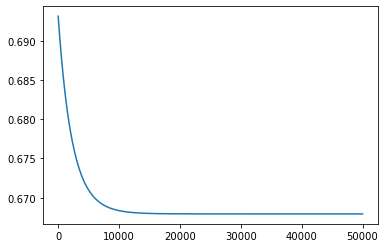

success!


In [50]:
print(bgd_theta)
print(len(bgd_cost))

print(bgd_cost[0])
plt.plot(bgd_cost)
plt.show()

# Test function: Do not remove
assert bgd_theta.shape == (X_train.shape[1] + 1,1) or bgd_theta.shape == (X_train.shape[1] + 1,) or bgd_theta.shape == X_train.shape[1] + 1, "theta shape is incorrect"
assert len(bgd_cost) == iterations, "cost data size is incorrect"

print("success!")
# End Test function

**Expected result (or look alike):**\
[[-0.07328673]\
 [-0.13632896]\
 [ 0.05430939]]\
50000

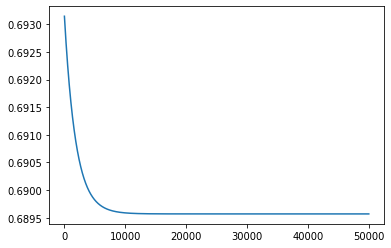

## In lab exercises

1. Verify that the gradient descent solution is correct. Plot the optimal decision boundary you obtain.

2. Write a new class that uses Newton's method for the optmization rather than simple gradient descent.

3. Verify that you obtain a similar solution with Newton's method. Plot the optimal decision boundary you obtain.

4. Compare the number of iterations required for gradient descent vs. Newton's method. Do you observe other issues
   with Newton's method such as a singular or nearly singular Hessian matrix?


### Exercise 1.9 (5 points)

Plot the optimal decision boundary of gradient ascent

In [51]:
test2 = Logistic_BGD()

In [52]:
y_test

array([1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1])

In [53]:
X_test[y_test ==0]

array([[ 1.05221555,  3.06298781],
       [ 0.28616858, -0.01488312],
       [ 0.7240154 ,  2.09116226],
       [ 1.57829571,  1.05445336],
       [ 0.60630287,  1.4932225 ],
       [ 0.75026607, -0.13935944],
       [ 1.85090771,  1.03255797],
       [ 0.09793746,  3.35395429],
       [ 1.99830485,  2.21044956],
       [ 0.24511715,  1.55425676],
       [-1.50744168,  2.28283045],
       [ 2.32762906,  2.12881803],
       [ 0.67288163,  0.98057817],
       [ 2.13696742,  3.01673351],
       [ 1.32898485,  0.30462115]])

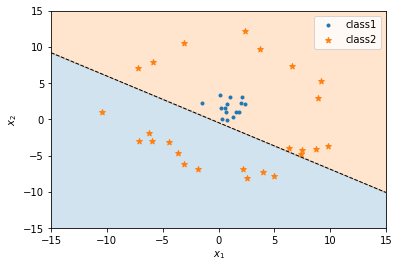

In [54]:
# Retrieve the model parameters.
b = bgd_theta[0]
w1 = bgd_theta[1]
w2 = bgd_theta[2]

# Calculate the intercept and gradient of the decision boundary.
c = b/w2
m = w1/w2

# Plot the data and the classification with the decision boundary.
xmin, xmax = -15, 15
ymin, ymax = -15, 15
xd = np.array([xmin, xmax])
yd = m*xd + c
plt.plot(xd, yd, 'k', lw=1, ls='--')
plt.fill_between(xd, yd, ymin, color='tab:blue', alpha=0.2)
plt.fill_between(xd, yd, ymax, color='tab:orange', alpha=0.2)

plt.scatter(X_test[y_test ==0][:, 0], X_test[y_test ==0][:, 1], marker = '.', label = 'class1')
plt.scatter(X_test[y_test ==1][:, 0], X_test[y_test ==1][:, 1], marker = '*', label = 'class2')
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.ylabel(r'$x_2$')
plt.xlabel(r'$x_1$')


plt.legend()
plt.show()

In [55]:
from sklearn.metrics import classification_report

In [56]:
print(classification_report(y_true =y_test , y_pred = BGD_model.predict(X_design_test,bgd_theta)  ))

              precision    recall  f1-score   support

           0       0.44      1.00      0.61        15
           1       1.00      0.24      0.39        25

    accuracy                           0.53        40
   macro avg       0.72      0.62      0.50        40
weighted avg       0.79      0.53      0.47        40



In [57]:
xd * m

array([ 9.63731389, -9.63731389])

In [58]:
w1/w2

-0.6424875926047316

In [59]:
bgd_theta[0] / bgd_theta[2]

-0.4565828902414966

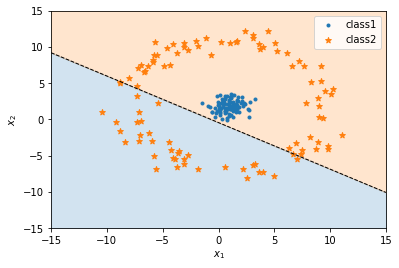

In [60]:
# Retrieve the model parameters.
b = bgd_theta[0]
w1 = bgd_theta[1]
w2 = bgd_theta[2]

# Calculate the intercept and gradient of the decision boundary.
c = b/w2
m = w1/w2

# w[1] * y = w[0] * x + b 
# # to solve for y
# y = (w[0] * x)/w[1] + b / w[1]

# Plot the data and the classification with the decision boundary.
xmin, xmax = -15, 15
ymin, ymax = -15, 15
xd = np.array([xmin, xmax])
yd = (m*xd) + c
plt.plot(xd, yd, 'k', lw=1, ls='--')
plt.fill_between(xd, yd, ymin, color='tab:blue', alpha=0.2)
plt.fill_between(xd, yd, ymax, color='tab:orange', alpha=0.2)

plt.scatter(X1[:, 0], X1[:, 1], marker = '.', label = 'class1')
plt.scatter(X2[:, 0], X2[:, 1], marker = '*', label = 'class2')
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.ylabel(r'$x_2$')
plt.xlabel(r'$x_1$')


plt.legend()
plt.show()

In [61]:
BGD_model.getAccuracy(X_design_test,y_test,bgd_theta)

52.5

**Expected result (or look alike):**\
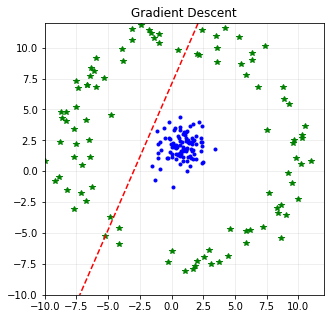

In [62]:
print("Accuracy =",BGD_model.getAccuracy(X_design_test,y_test,bgd_theta))

Accuracy = 52.5


### Exercise 2.1 (10 points)

Write Newton's method class

In [63]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [64]:
class Logistic_NM: #logistic regression for newton's method
      
    def __init__(self):
        pass
    
    def sigmoid(self,z):
        s = 1 / (1 + np.exp(-z))

        return s

    def h(self,X, theta):
        hf = np.dot(X, theta)
        yhat = self.sigmoid(hf)
     
        return yhat

    def gradient(self, X, y, y_pred):
        m = len(y)
        grad = (1/m) * np.dot(X.T, (y_pred - y))
 
        return grad
        
    def hessian(self, X, y, theta):
        yhat = self.h(X, theta) #sigmoid output
        s = yhat * (1-yhat)
        s = s.reshape(-1, 1)
        hess_mat = X.T @ ( X * s)

        return hess_mat
        
    def costFunc(self, theta, X, y):   
        
        m = len(y)
        yhat = self.h(X, theta)
        error = (y * np.log(yhat)) + ((1-y) * np.log(1-yhat))
        cost = (-1/m) * np.sum(error)
        grad = self.gradient(X, y, yhat)

        return cost, grad
    
    def newtonsMethod(self, X, y, theta, num_iters):
        m = len(y)
        J_history = []
        theta_history = []
        for i in range(num_iters):
            yhat = self.h(X, theta)
            cost, grad = self.costFunc(theta, X , y)
            hess_mat = self.hessian(X, y , theta)
       
            J_history.append(cost)
            theta_history.append(theta)
            
            #update theta
            theta = theta - (np.dot(  np.linalg.inv(hess_mat) , grad))
#             print(i)
#             print(cost)
#             print(grad)
#             print(hess_mat)
#             print(theta)
            
        J_min_index = np.argmin(J_history)
        print("Minimum at iteration:", J_min_index)
        return theta_history[J_min_index] , J_history

    def predict(self,X, theta):
        y_pred = self.h(X, theta)
        
        
        labels=[]
        for i in range(X.shape[0]):
            
            if y_pred[i] >= 0.5:
                labels.append(1)
            else:
                labels.append(0)
        
        
        labels=np.asarray(labels)
        return labels
     
    def getAccuracy(self,X,y,theta):
        y = y.ravel()
        predicted_list = self.predict(X, theta)
        total_correct = np.sum(predicted_list == y)
        m = len(predicted_list)
#         print(predicted_list)
#         print(total_correct)
#         print(m)
        
        percent_correct = (total_correct / m) *100

        return percent_correct

In [65]:
test_x.T @ (test_x * (test_y_p * (1- test_y_p)))

array([[11.29725396,  5.49706551],
       [ 5.49706551, 10.37936818]])

In [66]:
test_y_p.shape

(6, 1)

In [67]:
# Test function: Do not remove
lbgd = Logistic_NM()
test_x = np.array([[1,2,3,4,5]]).T
out_x1 = lbgd.sigmoid(test_x)
out_x2 = lbgd.sigmoid(test_x.T)
print('out_x1', out_x1.T)
assert np.array_equal(np.round(out_x1.T, 5), np.round([[0.73105858, 0.88079708, 0.95257413, 0.98201379, 0.99330715]], 5)), "sigmoid function is incorrect"
assert np.array_equal(np.round(out_x2, 5), np.round([[0.73105858, 0.88079708, 0.95257413, 0.98201379, 0.99330715]], 5)), "sigmoid function is incorrect"
test_t = np.array([[0.3, 0.2]]).T
test_x = np.array([[1,2,3,4,5, 6], [2, 9, 4, 3, 1, 0]]).T
test_y = np.array([[0,1,0,1,0,1]]).T
test_y_p = lbgd.h(test_x, test_t)
print('test_y_p', test_y_p.T)
assert np.array_equal(np.round(test_y_p.T, 5), np.round([[0.66818777, 0.9168273, 0.84553473, 0.85814894, 0.84553473, 0.85814894]], 5)), "hyperthesis function is incorrect"
test_g = lbgd.gradient(test_x, test_y, test_y_p)
print('test_g', test_g.T)
assert np.array_equal(np.round(test_g.T, 5), np.round([[0.9746016, 0.73165696]], 5)), "gradient function is incorrect"
test_h = lbgd.hessian(test_x, test_y, test_t)
print('test_h', test_h)
assert test_h.shape == (2, 2), "hessian matrix function is incorrect"
assert np.array_equal(np.round(test_h.T, 5), np.round([[12.17334371, 6.55487738],[ 6.55487738, 14.84880387]], 5)), "hessian matrix function is incorrect"
test_c, test_g = lbgd.costFunc(test_t, test_x, test_y)
print('test_c', test_c.T)
assert np.round(test_c, 5) == np.round(0.87192491, 5), "costFunc function is incorrect"
test_t_out , test_j = lbgd.newtonsMethod(test_x, test_y, test_t, 3)
print('test_t_out', test_t_out.T)
print('test_j', test_j)
assert np.array_equal(np.round(test_t_out.T, 5), np.round([[0.14765747, 0.15607017]], 5)), "newtonsMethod function is incorrect"
assert np.round(test_j[2], 5) == np.round(0.7534506190845247, 5), "newtonsMethod function is incorrect"
test_l = lbgd.predict(test_x, test_t)
print('test_l', test_l)
assert np.array_equal(np.round(test_l, 1), np.round([1,1,1,1,1,1], 1)), "gradientAscent function is incorrect"
test_a = lbgd.getAccuracy(test_x,test_y,test_t)
print('test_a', test_a)
assert np.round(test_a, 1) == 50.0, "getAccuracy function is incorrect"

print("success!")
# End Test function

out_x1 [[0.73105858 0.88079708 0.95257413 0.98201379 0.99330715]]
test_y_p [[0.66818777 0.9168273  0.84553473 0.85814894 0.84553473 0.85814894]]
test_g [[0.9746016  0.73165696]]
test_h [[11.29725396  5.49706551]
 [ 5.49706551 10.37936818]]


AssertionError: hessian matrix function is incorrect

**Expect result:**
out_x1 [[0.73105858 0.88079708 0.95257413 0.98201379 0.99330715]]\
test_y_p [[0.66818777 0.9168273  0.84553473 0.85814894 0.84553473 0.85814894]]\
test_g [[0.9746016  0.73165696]]\
test_h [[12.17334371  6.55487738]\
 [ 6.55487738 14.84880387]]\
test_c 0.8719249134773479\
Minimum at iteration: 2\
test_t_out [[0.14765747 0.15607017]]\
test_j [0.8719249134773479, 0.7967484437157274, 0.7534506190845247]\
test_l [1 1 1 1 1 1]\
test_a 50.0

Minimum at iteration: 999
theta: [-0.17631047 -0.24806574  0.38613374]
0.6931471805599454


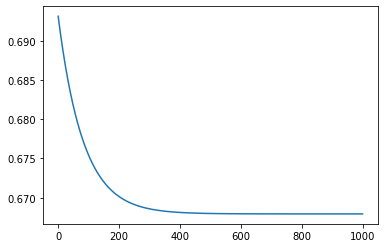

In [68]:
NM_model = Logistic_NM()

iterations = 1000

nm_theta, nm_cost = NM_model.newtonsMethod(X_design_train, y_train, initial_theta, iterations)
print("theta:",nm_theta)

print(nm_cost[0])
plt.plot(nm_cost)
plt.show()

**Expected result (or look alike):**\
Minimum at iteration: 999\
theta: [[-0.07313861]\
 [-0.13605172]\
 [ 0.05419746]]\
0.6931471805599453

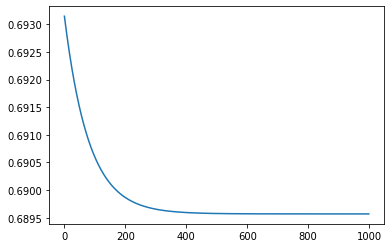

### Exercise 2.2 (5 points)

Plot the optimal decision boundary of Newton method

In [69]:
nm_theta

array([-0.17631047, -0.24806574,  0.38613374])

In [70]:
X[y==0][: , 0].shape

(100,)

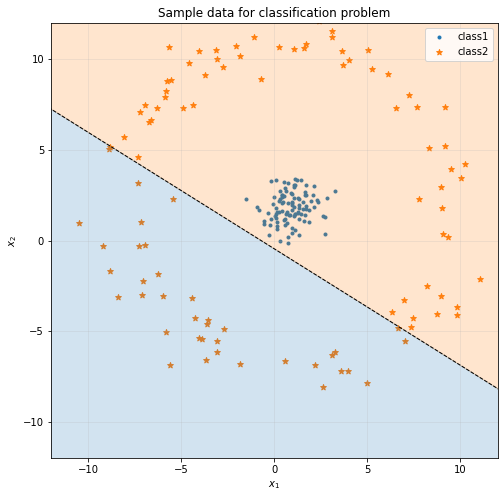

In [71]:
# plot

fig1 = plt.figure(figsize=(8,8))
ax = plt.axes() 
plt.title('Sample data for classification problem')
plt.grid(axis='both', alpha=.25)

plt.scatter(X[y==0][: , 0], X[y==0][: , 1], marker = '.',  label = 'class1')
plt.scatter(X[y==1][: , 0], X[y==1][: , 1], marker = '*', label = 'class2')

b = nm_theta[0]
w1 = nm_theta[1]
w2 = nm_theta[2]

# Calculate the intercept and gradient of the decision boundary.
c = b/w2
m = w1/w2

# w[1] * y = w[0] * x + b 
# # to solve for y
# y = (w[0] * x)/w[1] + b / w[1]

# Plot the data and the classification with the decision boundary.
xmin, xmax = -15, 15
ymin, ymax = -15, 15
# xd = np.array([xmin, xmax])
xd = np.linspace(-15, 15)
yd = (m*xd) + c
plt.plot(xd, yd, 'k', lw=1, ls='--')
plt.fill_between(xd, yd, ymin, color='tab:blue', alpha=0.2)
plt.fill_between(xd, yd, ymax, color='tab:orange', alpha=0.2)


plt.xlim(-12, 12)
plt.ylim(-12, 12)
plt.ylabel(r'$x_2$')
plt.xlabel(r'$x_1$')


plt.legend()
plt.show()



**Expected result (or look alike):**

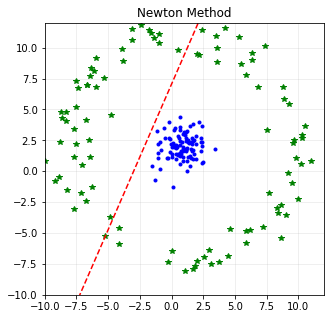

In [72]:
print("Accuracy =",NM_model.getAccuracy(X_design_test,y_test,bgd_theta))

Accuracy = 52.5


In [73]:
print(np.argmin(bgd_cost))
print(bgd_cost[np.argmin(bgd_cost)])
print()

print(np.argmin(nm_cost))
print(bgd_cost[np.argmin(nm_cost)])

49999
0.6679280712052752

999
0.6842329412851584


### Exercise 2.3 (5 points)

Compare the number of iterations required for gradient descent vs. Newton's method. Do you observe other issues with Newton's method such as a singular or nearly singular Hessian matrix?

- For gradient descent method, it takes as many as almost 50,000 iterations to achieve the lowest cost at around 0.69
- As for the Newton's method, the number of iterations dwarves to only around 1,000 times to achieve almost the same cost at 0.69
- This means that considering the computational expense, the Newton's method is way more effective than gradient descent

## Take-home exercises

1. Perform a *polar transformation* on the data above to obtain a linearly separable dataset. (5 points)

2. Verify that you obtain good classification accuracy for logistic regression with GD or Netwon's method
   after the polar transformation (10 points)
   
3. Apply Newton's method to the dataset you used for the take home exercises in Lab 03. (20 points)




## The report

Write a brief report covering your experiments (both in lab and take home) and submit the Jupyter notebook via JupyterHub at https://puffer.cs.ait.ac.th before the next lab.

In your solution, be sure to follow instructions!

## Perform the polar transformation on normalized data!!

In [74]:
X_norm.mean(axis= 0)

array([-4.32986980e-17, -9.76996262e-17])

In [75]:
angles = np.arctan((X_norm[:, 1] / X_norm[:, 0])) #X1 over X0
radius = np.sqrt(X_norm[:, 0]**2 + X_norm[:, 1]**2 )

print(angles[:5])
print(radius[:5])


[-0.11118019 -1.29694349  1.53721989  1.02212267 -1.42187275]
[0.09737283 0.07694153 0.23301547 0.31902115 0.25223514]


In [76]:
angles.shape

(200,)

In [77]:
radius.shape

(200,)

In [78]:
newX = np.vstack((angles, radius)).T
newX.shape

(200, 2)

In [79]:
newXtrain = newX[idx_train]
newXtest = newX[idx_test]

In [80]:
newXtrain = np.insert(newXtrain, 0 ,1 ,axis =1)
newXtest = np.insert(newXtest, 0 ,1 ,axis =1)

In [81]:
newXtrain.shape

(160, 3)

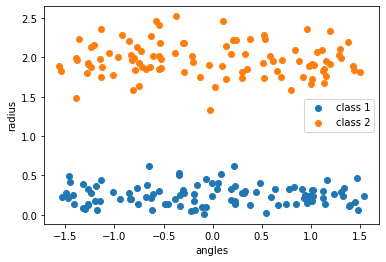

In [82]:
plt.scatter(newX[y == 0][:, 0], newX[y == 0][:, 1], label = 'class 1' )
plt.scatter(newX[y == 1][:, 0], newX[y == 1][:, 1], label = 'class 2' )
plt.xlabel('angles')
plt.ylabel('radius')
plt.legend()

In [83]:
alpha = 0.001
iterations = 50000


m,n = newXtrain.shape
polar_BGD_model = Logistic_BGD()
initial_theta = np.zeros(n)
polar_bgd_theta, polar_bgd_cost = polar_BGD_model.gradientAscent(newXtrain, y_train, initial_theta, alpha, iterations)

Minimum at iteration: 49999


In [84]:
polar_NM_model = Logistic_NM()

iterations = 1000

polar_nm_theta, polar_nm_cost = polar_NM_model.newtonsMethod(newXtrain, y_train, initial_theta, iterations)


Minimum at iteration: 999


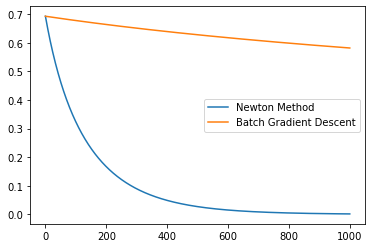

In [85]:
plt.plot(np.arange(1000), polar_nm_cost , label = 'Newton Method' )
plt.plot(np.arange(1000), polar_bgd_cost[:1000] , label = 'Batch Gradient Descent' )
plt.legend()

In [86]:
y_train

array([1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0])

### Validate the improved accuracy classification on Training Data

In [87]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [88]:
bgd_pred_train = polar_BGD_model.predict(newXtrain, polar_bgd_theta)
polar_BGD_model.getAccuracy(newXtrain, y_train, polar_bgd_theta )

100.0

In [89]:
nm_pred_train = polar_NM_model.predict(newXtrain, polar_nm_theta)
polar_NM_model.getAccuracy(newXtrain, y_train, polar_nm_theta )

100.0

### Validate the improved accuracy classification on TestData

In [90]:
bgd_pred_test = polar_BGD_model.predict(newXtest, polar_bgd_theta)
polar_BGD_model.getAccuracy(newXtest, y_test, polar_bgd_theta )

100.0

In [91]:
nm_pred_test = polar_NM_model.predict(newXtest, polar_nm_theta)
polar_NM_model.getAccuracy(newXtest, y_test, polar_nm_theta )

100.0

In [92]:
nm_pred_train.shape

(160,)

In [93]:
y_train.shape

(160,)

In [94]:
confusion_matrix(y_true = y_train, y_pred = nm_pred_train)

array([[85,  0],
       [ 0, 75]])

In [95]:
bgd_pred_train

array([1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0])

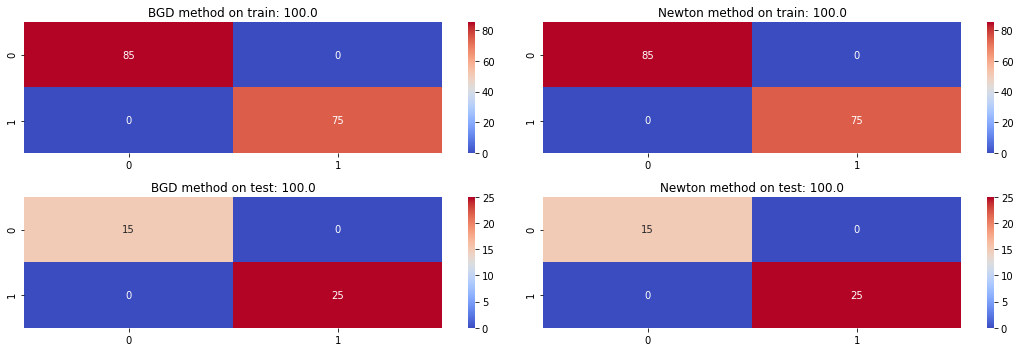

In [96]:
fig ,axes = plt.subplots(2 ,2 ,figsize = (15,5))

sns.heatmap(confusion_matrix(y_true = y_train, y_pred = bgd_pred_train), cmap = 'coolwarm', annot =True, ax = axes[0,0])
sns.heatmap(confusion_matrix(y_true = y_train, y_pred = nm_pred_train), cmap = 'coolwarm', annot =True, ax = axes[0,1])


sns.heatmap(confusion_matrix(y_true = y_test, y_pred = bgd_pred_test), cmap = 'coolwarm', annot =True, ax = axes[1,0])
sns.heatmap(confusion_matrix(y_true = y_test, y_pred = nm_pred_test), cmap = 'coolwarm', annot =True, ax = axes[1,1])


axes[0,0].set_title(f'BGD method on train: {polar_BGD_model.getAccuracy(newXtrain, y_train, polar_bgd_theta )}')
axes[0,1].set_title(f'Newton method on train: {polar_NM_model.getAccuracy(newXtrain, y_train, polar_nm_theta )}')
axes[1,0].set_title(f'BGD method on test: {polar_BGD_model.getAccuracy(newXtest, y_test, polar_bgd_theta )}')
axes[1,1].set_title(f'Newton method on test: {polar_NM_model.getAccuracy(newXtest, y_test, polar_nm_theta )}')

plt.tight_layout()
plt.show()

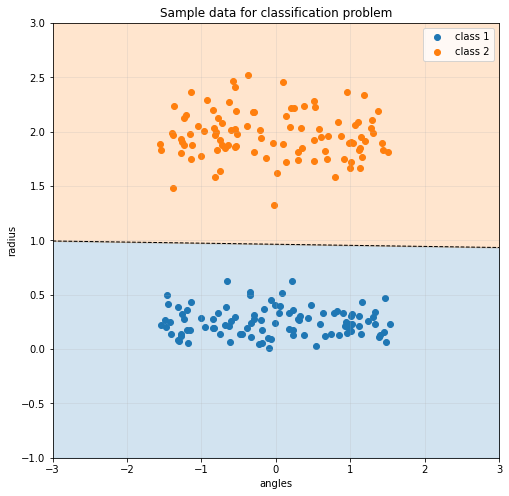

In [97]:
# plot

fig1 = plt.figure(figsize=(8,8))
ax = plt.axes() 
plt.title('Sample data for classification problem')
plt.grid(axis='both', alpha=.25)

plt.scatter(newX[y == 0][:, 0], newX[y == 0][:, 1], label = 'class 1' )
plt.scatter(newX[y == 1][:, 0], newX[y == 1][:, 1], label = 'class 2' )
plt.xlabel('angles')
plt.ylabel('radius')
plt.legend()



b = polar_nm_theta[0]
w1 = polar_nm_theta[1]
w2 = polar_nm_theta[2]

# Calculate the intercept and gradient of the decision boundary.
c = b/w2
m = w1/w2

xmin, xmax = -3, 3
ymin, ymax = -1, 3
xd = np.array([xmin, xmax])
# xd = np.linspace(-3, 3, 100)
yd = (m*xd) + c

yd += 2
plt.plot(xd, yd, 'k', lw=1, ls='--')
plt.fill_between(xd, yd, ymin, color='tab:blue', alpha=0.2)
plt.fill_between(xd, yd, ymax, color='tab:orange', alpha=0.2)


plt.xlim(-3, 3)
plt.ylim(-1, 3)


plt.xlabel('angles')
plt.ylabel('radius')
plt.legend()



## Summary from polar transformation
- After using the polar transformation, the accuracy rate on both training and test sets skyrockets to 100%, meaning the model can find the linearly seperable line that classify data into 2 classes
- In terms of iterations, the Newton's method performs significantly better as it needs to iterate fewer than 1000 times to achieve perfect classification, compared to almost 10,000 iterations for Batch Gradient Descent method with learning rate at 0.001

---
# Perform Newton's Method on Lab03dataset

In [98]:
import pandas as pd

In [99]:
data_train = pd.read_csv('clean_train.csv')
data_test = pd.read_csv('clean_test.csv')

In [100]:
data_train = data_train.iloc[:, 1:]

In [101]:
data_test = data_test.iloc[:, 1:]

In [102]:
X = data_train.iloc[:, :-1]
y = data_train.iloc[:, -1]

In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.3, random_state = 16) 

In [104]:
data_train.shape

(614, 12)

In [105]:
X_train.shape

(429, 11)

In [106]:
X_test.shape

(185, 11)

### Normalize the data

In [107]:
numerical_cols = ['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

In [108]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

In [109]:
normalized_X_train = X_train
normalized_X_test = X_test
normalized_data_test = data_test

In [110]:
normalized_X_train[numerical_cols] = std_scaler.fit_transform(normalized_X_train[numerical_cols])

/tmp/ipykernel_307/3168317029.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  normalized_X_train[numerical_cols] = std_scaler.fit_transform(normalized_X_train[numerical_cols])
/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [111]:
normalized_X_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
119,0,0,-0.705357,0,0,0.802648,-0.497606,1.289912,0.247680,1.0,2
199,1,0,-0.705357,0,1,0.900462,-0.497606,-0.770259,0.247680,1.0,2
20,1,1,-0.705357,1,0,0.348609,-0.497606,-0.524444,0.247680,0.0,2
253,1,1,0.119161,1,0,-0.477352,1.652278,1.524022,-2.553407,1.0,1
548,0,0,-0.705357,0,0,-0.090890,-0.497606,-0.536149,0.247680,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
452,1,1,-0.705357,0,0,-0.264707,0.027073,0.002305,0.247680,0.0,0
321,1,1,2.592716,0,0,-0.199608,-0.440385,-0.290333,0.247680,1.0,1
581,1,0,-0.705357,0,0,-0.613663,9.746813,-0.688321,0.247680,1.0,2
121,0,0,-0.705357,0,0,-0.228688,-0.497606,-1.226775,0.247680,1.0,1


In [112]:
normalized_X_test[numerical_cols] = std_scaler.transform(normalized_X_test[numerical_cols])

/tmp/ipykernel_307/1923492441.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  normalized_X_test[numerical_cols] = std_scaler.transform(normalized_X_test[numerical_cols])
/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [113]:
normalized_X_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
274,1,1,0.943680,0,0,-0.272638,-0.497606,-0.688321,0.247680,1.0,1
315,1,1,0.119161,1,0,-0.355416,-0.001083,-0.442505,-2.553407,1.0,2
175,1,1,-0.705357,0,0,-0.339224,0.097010,-0.383977,0.247680,1.0,0
598,1,1,-0.705357,0,1,0.729123,-0.497606,0.365176,0.247680,1.0,0
390,1,0,2.592716,0,0,0.597604,-0.497606,0.423703,0.247680,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...
436,1,0,-0.705357,0,0,-0.598793,0.062799,-1.156542,0.247680,1.0,1
523,1,1,0.943680,0,1,0.396194,1.671957,3.876831,0.247680,1.0,0
213,1,1,2.592716,1,1,0.025263,-0.497606,-0.220100,0.247680,1.0,0
173,1,1,-0.705357,0,0,0.026089,1.205407,0.447114,0.247680,1.0,1


In [114]:
normalized_data_test[numerical_cols] = std_scaler.transform(normalized_data_test[numerical_cols])

In [115]:
normalized_data_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,-1.286937,0,0,-0.917012,-0.497757,-1.747134,-5.350639,1.0,2
1,1,1,-0.607107,0,0,-0.917084,-0.497620,-1.744942,-5.350639,1.0,2
2,1,1,0.072724,0,0,-0.917031,-0.497592,-1.733706,-5.350639,1.0,2
3,1,1,0.072724,0,0,-0.917104,-0.497524,-1.748504,-5.350639,1.0,2
4,1,0,-1.286937,1,0,-0.917079,-0.497757,-1.751519,-5.350639,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
362,1,1,1.432385,1,1,-0.917058,-0.497594,-1.746723,-5.350639,1.0,2
363,1,1,-1.286937,0,0,-0.917054,-0.497692,-1.746449,-5.350639,1.0,2
364,1,0,-1.286937,0,0,-0.917079,-0.497574,-1.744942,-5.350639,0.0,1
365,1,1,-1.286937,0,0,-0.917031,-0.497538,-1.740557,-5.350639,1.0,0


### Turn pandas dataframe into numpy for easier manipulation and Train the model

In [116]:
np_Xtrain = np.asarray(normalized_X_train)
np_Xtest = np.asarray(normalized_X_test)
np_ytrain = np.asarray(y_train)
np_ytest = np.asarray(y_test)

In [117]:
np_Xtrain = np.insert(np_Xtrain, 0,1, axis=1)
np_Xtest =  np.insert(np_Xtest, 0,1, axis=1)

In [118]:
np_Xtrain.shape

(429, 12)

In [119]:
alpha = 0.001
iterations = 50000

m,n = np_Xtrain.shape

BGD_model = Logistic_BGD()
initial_theta = np.zeros(n)
bgd_theta, bgd_cost = BGD_model.gradientAscent(np_Xtrain, np_ytrain, initial_theta, alpha, iterations)

Minimum at iteration: 49999


In [120]:
bgd_cost[-1]

0.4794791327357925

In [121]:
bgd_yhat = BGD_model.predict(np_Xtest, bgd_theta)

In [122]:
m,n = np_Xtrain.shape
initial_theta = np.zeros(n)
iterations = 1000


NM_model = Logistic_NM()

nm_theta, nm_cost = NM_model.newtonsMethod(np_Xtrain, np_ytrain, initial_theta, iterations)
# print("theta:",nm_theta)

Minimum at iteration: 999


In [123]:
nm_cost[-1]

0.4635955902680171

In [124]:
nm_yhat = NM_model.predict(np_Xtest, nm_theta)

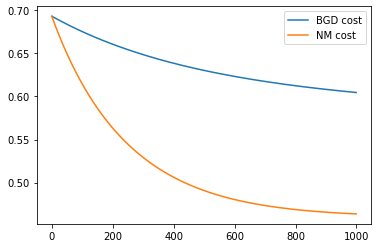

In [125]:
iteration = 1000
plt.plot(np.arange(iteration), bgd_cost[:iteration], label = 'BGD cost')
plt.plot(np.arange(iteration), nm_cost[:iteration], label = 'NM cost')

plt.legend()
plt.show()

In [126]:
from sklearn.metrics import accuracy_score

In [127]:
bgd_yhat.shape

(185,)

In [128]:
np.sum(bgd_yhat)

156

In [129]:
confusion_matrix(y_true =np_ytest, y_pred = bgd_yhat )  / len(bgd_yhat)

array([[0.14054054, 0.19459459],
       [0.01621622, 0.64864865]])

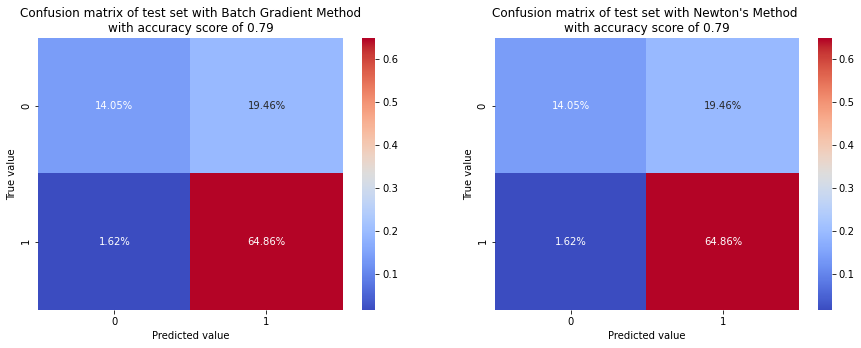

In [130]:
fig, axes = plt.subplots(1,2, figsize = (15,5))

sns.heatmap(confusion_matrix(y_true =np_ytest, y_pred = bgd_yhat )  / len(bgd_yhat) , cmap = 'coolwarm', annot =True, fmt = ".2%" ,ax = axes[0])
axes[0].set_title(f'Confusion matrix of test set with Batch Gradient Method\nwith accuracy score of {np.round(accuracy_score(y_true = np_ytest, y_pred = bgd_yhat ), 2)}')
axes[0].set_ylabel('True value')
axes[0].set_xlabel('Predicted value')

sns.heatmap(confusion_matrix(y_true =np_ytest, y_pred = nm_yhat )  / len(nm_yhat) , cmap = 'coolwarm', annot =True, fmt = ".2%" ,ax = axes[1])
axes[1].set_title(f"Confusion matrix of test set with Newton's Method \nwith accuracy score of {np.round(accuracy_score(y_true = np_ytest, y_pred = nm_yhat ), 2)}")
axes[1].set_ylabel('True value')
axes[1].set_xlabel('Predicted value')

plt.show()

---
## Summary from running BGD and NW methods on Lab03 data (Loan Prediction)
- The accuracy rate from both approaches result in almost the same prediction accuracy rate, at $\textbf{79%}$
- However, effectivenes-wise, it takes only $\textbf{1,000 iterations for Newton's method}$ to achieve such rate, compared to the computationally expensive 50,000 times of iteration of normal Batch Gradient Descent method
- In conclusion, the Newton's Method is the preferred choice as it manages to yield the same classificaiton accuracy with far fewer computations